# <a id='toc1_'></a>[Data Cleaning and EDA](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [Data Cleaning and EDA](#toc1_)    
    - [Imports](#toc1_1_1_)    
    - [Configure standard plot format](#toc1_1_2_)    
  - [Load + Summary Stats](#toc1_2_)    
    - [Preliminary exploratory cleaning](#toc1_2_1_)    
      - [Size features:](#toc1_2_1_1_)    
      - [Location Features](#toc1_2_1_2_)    
  - [Missing Values](#toc1_3_)    
  - [Correlation Exploration](#toc1_4_)    
      - [Saleprice Correlation Heatmap](#toc1_4_1_1_)    
        - [Interpretation:](#toc1_4_1_1_1_)    
      - [Saleprice exploration:](#toc1_4_1_2_)    
        - [Interpretation:](#toc1_4_1_2_1_)    
      - [Will be using this reduced dataset:](#toc1_4_1_3_)    
      - [Numeric Column Exploration](#toc1_4_1_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

___

### <a id='toc1_1_1_'></a>[Imports](#toc0_)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
from matplotlib.ticker import FuncFormatter

### <a id='toc1_1_2_'></a>[Configure standard plot format](#toc0_)

In [2]:
# Borrowed from: https://github.com/ganeshmorye/Ames_Housing_Linear_Regression_Modeling

#functions to format all the figures in consistent manner
dpi = 500
def format_fig(fig, flag='NotTimeSeries', grid = 'NotFacetGrid'):
    if grid == 'NotFacetGrid':
        fig.suptitle(fig._suptitle.get_text(), fontsize=18, fontweight = 'extra bold', 
                     fontfamily = 'Cambria', color = 'ghostwhite')
        fig.set_facecolor('black')
    elif grid == 'FacetGrid':
        fig.fig.suptitle(fig.fig._suptitle.get_text(), fontsize=18, fontweight = 'extra bold', 
                     fontfamily = 'Cambria', color = 'ghostwhite')
        fig.fig.set_facecolor('black')
    else:
        pass
    
    #loop through all the axes in the figure
    for ax in fig.axes:
        ax.grid(False)
        ax.set_facecolor('black')
        ax.tick_params(axis='both', which='both', labelsize=12, labelcolor = 'ghostwhite', color='ghostwhite')
        if flag == 'NotTimeSeries':
            ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
        elif flag == 'TimeSeries':
            axPrimary = ax.get_shared_x_axes().get_siblings(ax)[1]
            axPrimary.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
        elif flag =='NoFormatting':
            pass
        else:
            pass

        ax.xaxis.get_label().set_fontname('Cambria')
        ax.xaxis.get_label().set_fontsize(10)
        ax.xaxis.get_label().set_color('ghostwhite')
        ax.yaxis.get_label().set_fontname('Cambria')
        ax.yaxis.get_label().set_fontsize(10)
        ax.yaxis.get_label().set_color('ghostwhite')

        ax.spines['bottom'].set_color('ghostwhite')
        ax.spines['top'].set_color('ghostwhite') 
        ax.spines['right'].set_color('ghostwhite')
        ax.spines['left'].set_color('ghostwhite')

        ax.set_title(ax.get_title(), fontsize=14, fontweight = 'extra bold', fontfamily = 'Cambria', color = 'ghostwhite')

## <a id='toc1_2_'></a>[Load + Summary Stats](#toc0_)

In [3]:
df = pd.read_csv('../datasets/train.csv')
df.columns = df.columns.str.replace(' ','_').str.lower()
df.rename(columns={'year_remod/add':'year_remod_or_add'},inplace=True)
print(df.shape)
df.head()

(2051, 81)


,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
df.describe()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod_or_add,mas_vnr_area,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


### <a id='toc1_2_1_'></a>[Preliminary exploratory cleaning](#toc0_)

#### <a id='toc1_2_1_1_'></a>[Size features:](#toc0_)

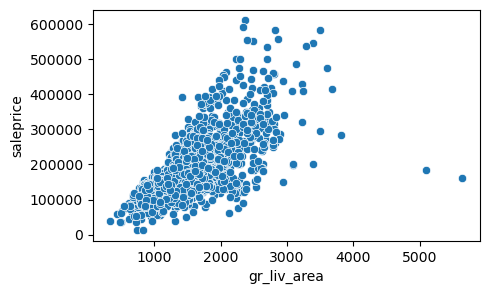

In [5]:
# as per the recommendation in the data dictionary:
plt.figure(figsize=(5,3))
sns.scatterplot(x=df.gr_liv_area,y=df.saleprice);

In [6]:
# Removing those 2 outliers on bottom right:
df = df.loc[df.gr_liv_area<4000]

In [7]:
# Looking deeper into the sqftage columns:
df[['total_bsmt_sf','gr_liv_area','1st_flr_sf','2nd_flr_sf']].head()

,total_bsmt_sf,gr_liv_area,1st_flr_sf,2nd_flr_sf
0,725.0,1479,725,754
1,913.0,2122,913,1209
2,1057.0,1057,1057,0
3,384.0,1444,744,700
4,676.0,1445,831,614


Looks like gr_liv_area is just the sum of the first and second floor areas.

In [8]:
# Would you look at that!
df.gr_liv_area.corr(df.saleprice)

0.7194632022924597

In [9]:
# We'll engineer this into a feature of our final data set
total_area = df.gr_liv_area + df.total_bsmt_sf + df.garage_area
total_area.corr(df.saleprice)

0.8536598281081873

#### <a id='toc1_2_1_2_'></a>[Location Features](#toc0_)

In [10]:
df.ms_zoning.unique()

array(['RL', 'RM', 'FV', 'C (all)', 'A (agr)', 'RH', 'I (all)'],
      dtype=object)

In [11]:
# # Gettin rid of properties that aren't resedential
# # See data dictionary
# non_res = ['C (all)', 'I (all)', 'A (agr)']
# df = df.loc[df.ms_zoning.apply(lambda x: x not in non_res)]

In [12]:
df.shape

(2049, 81)

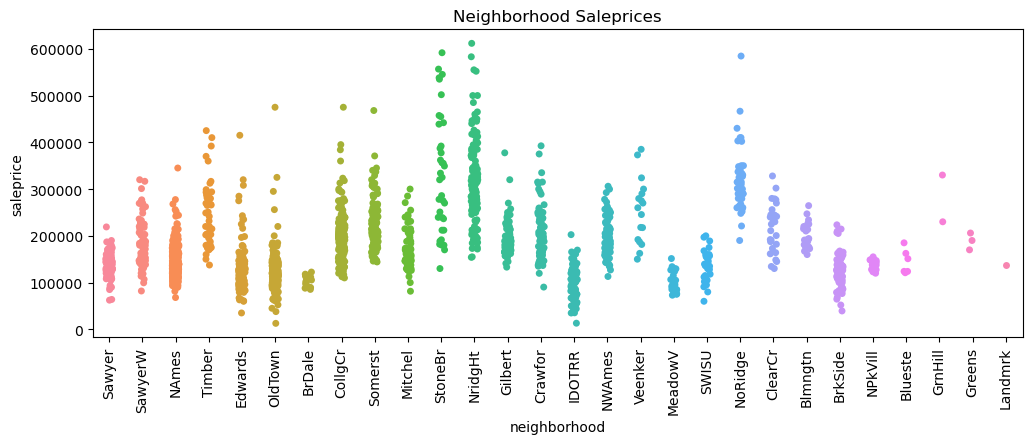

In [13]:
# Taking a look at the neighborhoods and their saleprice distributions:
plt.figure(figsize=(12,4))
sns.stripplot(x=df.neighborhood,y=df.saleprice)
plt.xticks(rotation= 90)
plt.title('Neighborhood Saleprices');

Unfortunately it doesn't look like saleprice can be closely linked to the neighborhoods themselves, but I am wondering if looking at the average overall quality, above ground size, and the year built of the houses in each neighborhood would help estimate this from another perspective.

In [14]:
# Creating standardized location scores
location_vars = ['overall_qual','year_built','gr_liv_area']    
df['location'] = sum([stats.zscore(df[col]) for col in location_vars])
df.location.corr(df.saleprice)

0.8663253128883001

In [15]:
# Then using them to identify neighborhoods that might be pricier
n_loc_scores = (df[['location','neighborhood']]
 .groupby('neighborhood')
 .mean()
 .sort_values(by='location')
).reset_index()
n_loc_scores

,neighborhood,location
0,IDOTRR,-3.091759
1,BrkSide,-2.419150
2,OldTown,-2.347715
3,MeadowV,-1.913291
4,Edwards,-1.713330
5,Sawyer,-1.703910
6,SWISU,-1.591770
7,NAmes,-1.368094
8,BrDale,-1.050368
9,Mitchel,-0.311656


I believe this gives a rough estimate of the neighborhood price ranges. Since we have 27 neighborhoods, I'm going to split this into 3 ordinal values to map onto the neighborhoods:

In [16]:
ns = n_loc_scores.neighborhood.tolist()
low_cost = ns[:10]
mid_cost = ns[10:19]
high_cost = ns[19:]

def add_cost_group(x):
    if x in low_cost:
        return 1
    if x in mid_cost:
        return 2
    if x in high_cost:
        return 3
    
df.location = df.neighborhood.map(add_cost_group)

In [17]:
low_cost

['IDOTRR',
 'BrkSide',
 'OldTown',
 'MeadowV',
 'Edwards',
 'Sawyer',
 'SWISU',
 'NAmes',
 'BrDale',
 'Mitchel']

In [18]:
mid_cost

['Crawfor',
 'NPkVill',
 'Blueste',
 'Landmrk',
 'ClearCr',
 'NWAmes',
 'Greens',
 'GrnHill',
 'SawyerW']

In [19]:
high_cost

['CollgCr',
 'Gilbert',
 'Blmngtn',
 'Veenker',
 'Timber',
 'Somerst',
 'StoneBr',
 'NridgHt',
 'NoRidge']

In [20]:
df.location.corr(df.saleprice)

0.6254121116950219

## <a id='toc1_3_'></a>[Missing Values](#toc0_)

68.87899941826643

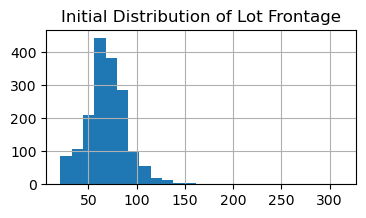

In [21]:
# Distribution of lot frontage is fairly normal. From what I understand about houses, they need to have
# at least some frontage to connect to the street, so this value can't be zero. However, there are enough
# nulls that a simple mean imputation seems like it might throw off our data significantly. So, I will impute
# the values using the lot_frontage probability distribution.

plt.figure(figsize=(4,2))
plt.title('Initial Distribution of Lot Frontage')
df.lot_frontage.hist(bins=25);
df.lot_frontage.mean()

In [22]:
np.random.seed(1234)

# creating value & frequency lists for random choice
sample = df.lot_frontage.loc[df.lot_frontage.notna()]
frontage = sample.value_counts().index.to_series()
freq = sample.value_counts().values/len(sample)
# df.lot_frontage = df.lot_frontage.fillna(
#     np.random.choice(frontage,p=freq,replace=False)
# )

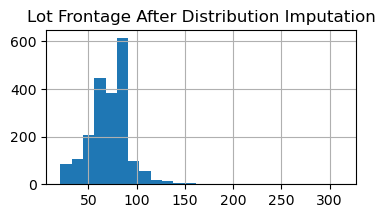

In [23]:
plt.figure(figsize=(4,2))
plt.title('Lot Frontage After Distribution Imputation')
df.lot_frontage.fillna(
    np.random.choice(frontage,p=freq,replace=False)
).hist(bins=25);

We get an increase in the mean by 2sqft, which is rather marginal, but I don't like the shape this data takes on. The distribution imputation definitley skewed this otherwise approximately normal distribution.

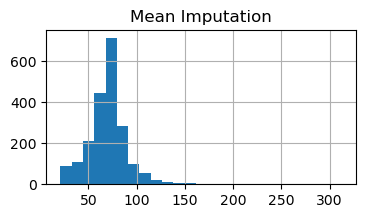

In [24]:
# Now using mean imputation: 
df.lot_frontage = df.lot_frontage.fillna(np.mean(df.lot_frontage))
plt.figure(figsize=(4,2))
plt.title('Mean Imputation')
df.lot_frontage.hist(bins=25)
df.lot_frontage.mean();

Very nice. 

In [25]:
# Since these columns have only 1-2 null values, I'm going to impute them with the column mean

def column_mean_impute(df,cols:list):
    for col in cols:
        mean = np.mean(df[col])
        df[col] = df[col].fillna(mean)
    return df

impute_cols = [
    'garage_area',
    'bsmtfin_sf_1',
    'bsmtfin_sf_2',
    'bsmt_unf_sf',
    'total_bsmt_sf',
    'bsmt_full_bath',
    'bsmt_half_bath',
    'garage_cars',
    'mas_vnr_area'
    ]

df = column_mean_impute(df,impute_cols)

In [26]:
# Columns where nulls indicate Not Applicable/None --> Impute 0 (numeric) or 'None' (strings)
#  24  mas_vnr_type       2029 non-null   object  
#  29  bsmt_qual          1996 non-null   object  
#  30  bsmt_cond          1996 non-null   object  
#  31  bsmt_exposure      1993 non-null   object 
#  32  bsmtfin_type_1     1996 non-null   object  
#  34  bsmtfin_type_2     1995 non-null   object 
#  56  fireplace_qu       1051 non-null   object 
#  57  garage_type        1938 non-null   object 
#  59  garage_finish      1937 non-null   object 
#  62  garage_qual        1937 non-null   object 
#  63  garage_cond        1937 non-null   object 
#  71  pool_qc            9 non-null      object 
#  72  fence              400 non-null    object 
#  73  misc_feature       65 non-null     object 



def fill_na_by_dtype(df,cols):
    for col in cols:
        if df[col].dtype in (str,object):
            df[col] = df[col].fillna('None')
        else:
            df[col] = df[col].fillna(0)
    return df

fill_zero = [
    'bsmt_qual',
    'bsmt_cond',
    'bsmt_exposure',
    'bsmtfin_type_1',
    'bsmtfin_type_2',
    'fireplace_qu',
    'garage_type',
    'garage_finish',
    'garage_qual',
    'garage_cond',
    'pool_qc',
    'fence',
    'misc_feature',
    'street',
    'alley'
]

df = fill_na_by_dtype(df,fill_zero)

In [27]:
# Impute missings here with year of house construction
#  58  garage_yr_blt      1937 non-null   float64
df.garage_yr_blt = np.where(df.garage_yr_blt.isna(),df.year_built,df.garage_yr_blt)

In [28]:
df.to_csv('../datasets/no_missings_train.csv',index=False)

## <a id='toc1_4_'></a>[Correlation Exploration](#toc0_)

In [29]:
# Will need this frequently: (Categorical Numerics)
cat_nums = [
    "year_built",
    "year_remod_or_add",
    "garage_yr_blt",
    "pid",
    "id",
    "yr_sold",
    "ms_subclass",
    "mo_sold"]

#### <a id='toc1_4_1_1_'></a>[Saleprice Correlation Heatmap](#toc0_)

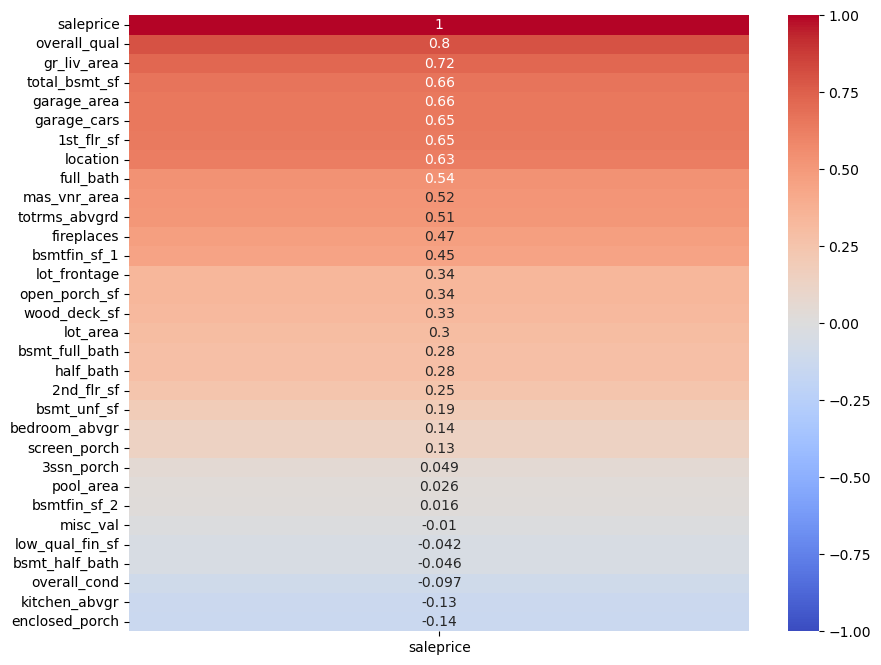

In [30]:
# stolen from the model workflow lesson
plt.figure(figsize=(10,8))
corr_matrix = (
            df.drop(columns=cat_nums)
            .corr()[['saleprice']]
            .sort_values(by='saleprice', ascending=False))
sns.heatmap(corr_matrix, 
            annot=True,
            vmin=-1,
            vmax=1,
            cmap = 'coolwarm');

##### <a id='toc1_4_1_1_1_'></a>[Interpretation:](#toc0_)

While it is a shame that this plot doesn't help us understand the many categorical variables present in the dataset, it does give us an idea of which features to focus our exploration on. When constructing our model, we'll opt to include as many features as possible while reducing dimensionality to keep our model no more complex than it needs to be.

To do this, we'll engineer some new features that seek to combine information shared between columns like distance (space) measures, time, and counts. More on this later! 

---

#### <a id='toc1_4_1_2_'></a>[Saleprice exploration:](#toc0_)

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6),dpi=1000)
fig.suptitle('Distribution of Saleprice')
format_fig(fig,'NoFormatting')
# Create a boxplot
sns.boxplot(data=df['saleprice'], ax=ax1, color='cyan')
# Create a histogram
sns.histplot(df['saleprice'], ax=ax2, color='cyan');

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


##### <a id='toc1_4_1_2_1_'></a>[Interpretation:](#toc0_)

Saleprice follows a right skew distribution. At this point, I see two choices for moving forward. One might opt to apply a log scale to the saleprice data to "punish" large values for standing out. Another solution would be to simply remove those outliers. We will be doing the latter.

#### <a id='toc1_4_1_3_'></a>[Will be using this reduced dataset:](#toc0_)

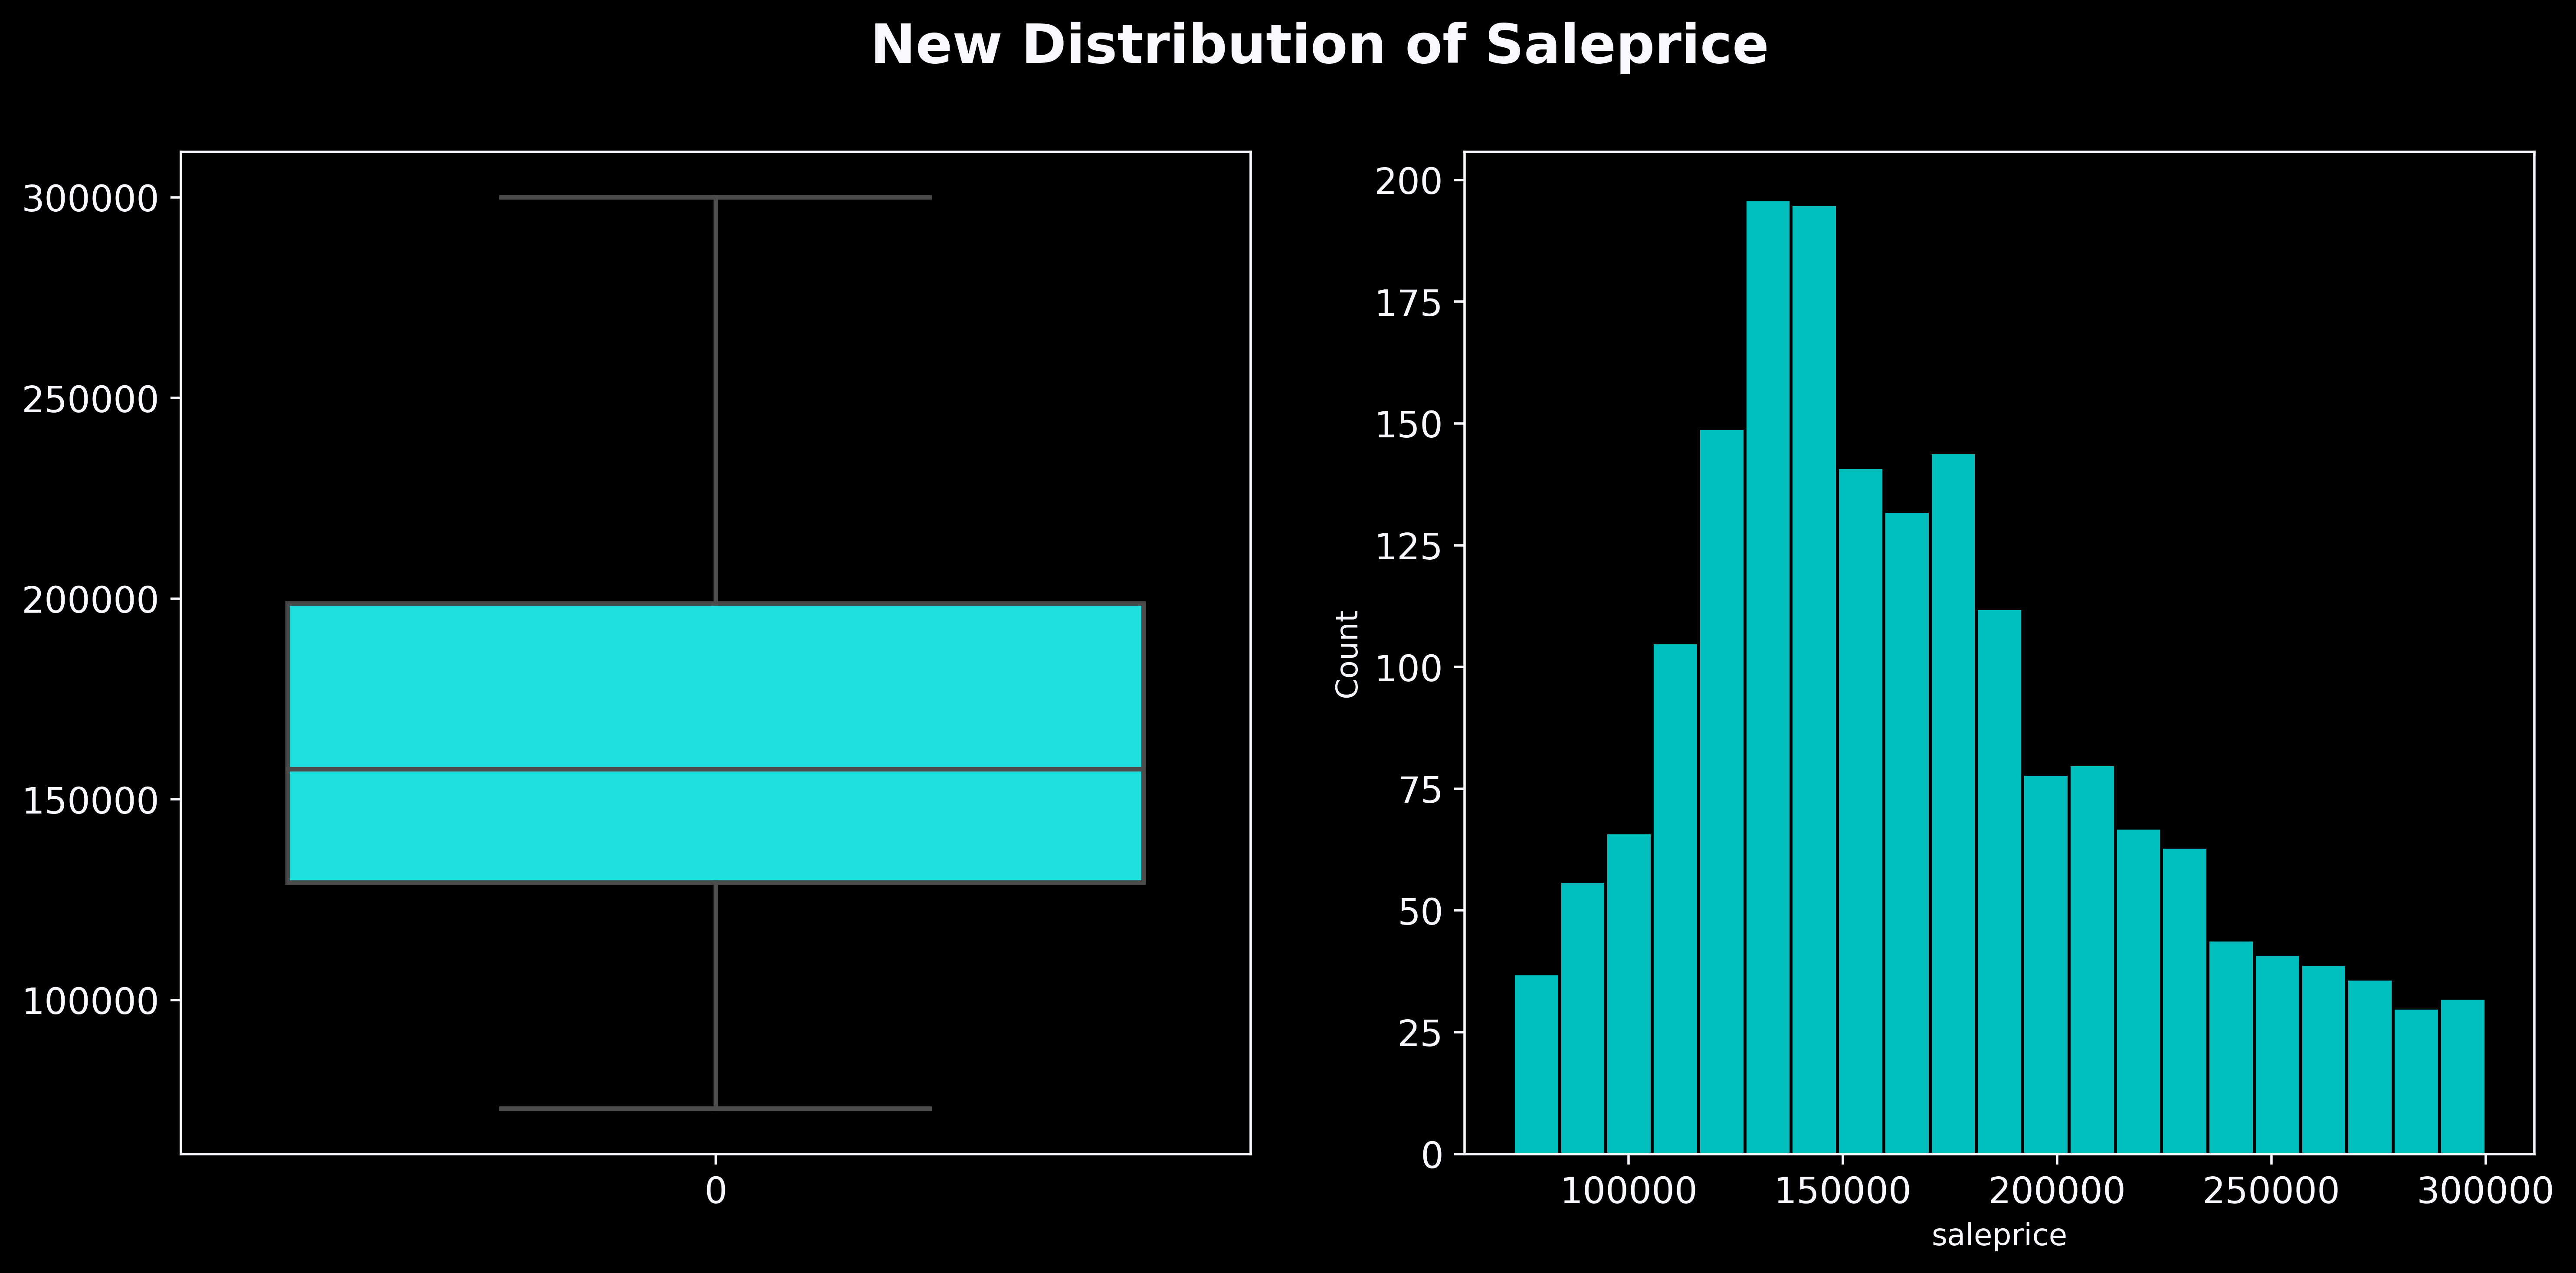

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6),dpi=500)
fig.suptitle('New Distribution of Saleprice')
format_fig(fig,'NoFormatting')
# Create a boxplot
sns.boxplot(data=df['saleprice'], ax=ax1, color='cyan')
# Create a histogram
sns.histplot(df['saleprice'], ax=ax2, color='cyan');

In [37]:
# Now actually applying this to the data!
df = df.loc[
    (df.saleprice < df.saleprice.quantile(.96)) &
    (df.saleprice > df.saleprice.quantile(.01))
]

#### <a id='toc1_4_1_4_'></a>[Numeric Column Exploration](#toc0_)

In [34]:
len_df_numeric = len(df.select_dtypes(np.number).columns)
ncols = 6
nrows = math.ceil(len_df_numeric/ncols)
len_df_numeric, nrows, ncols

(40, 7, 6)

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


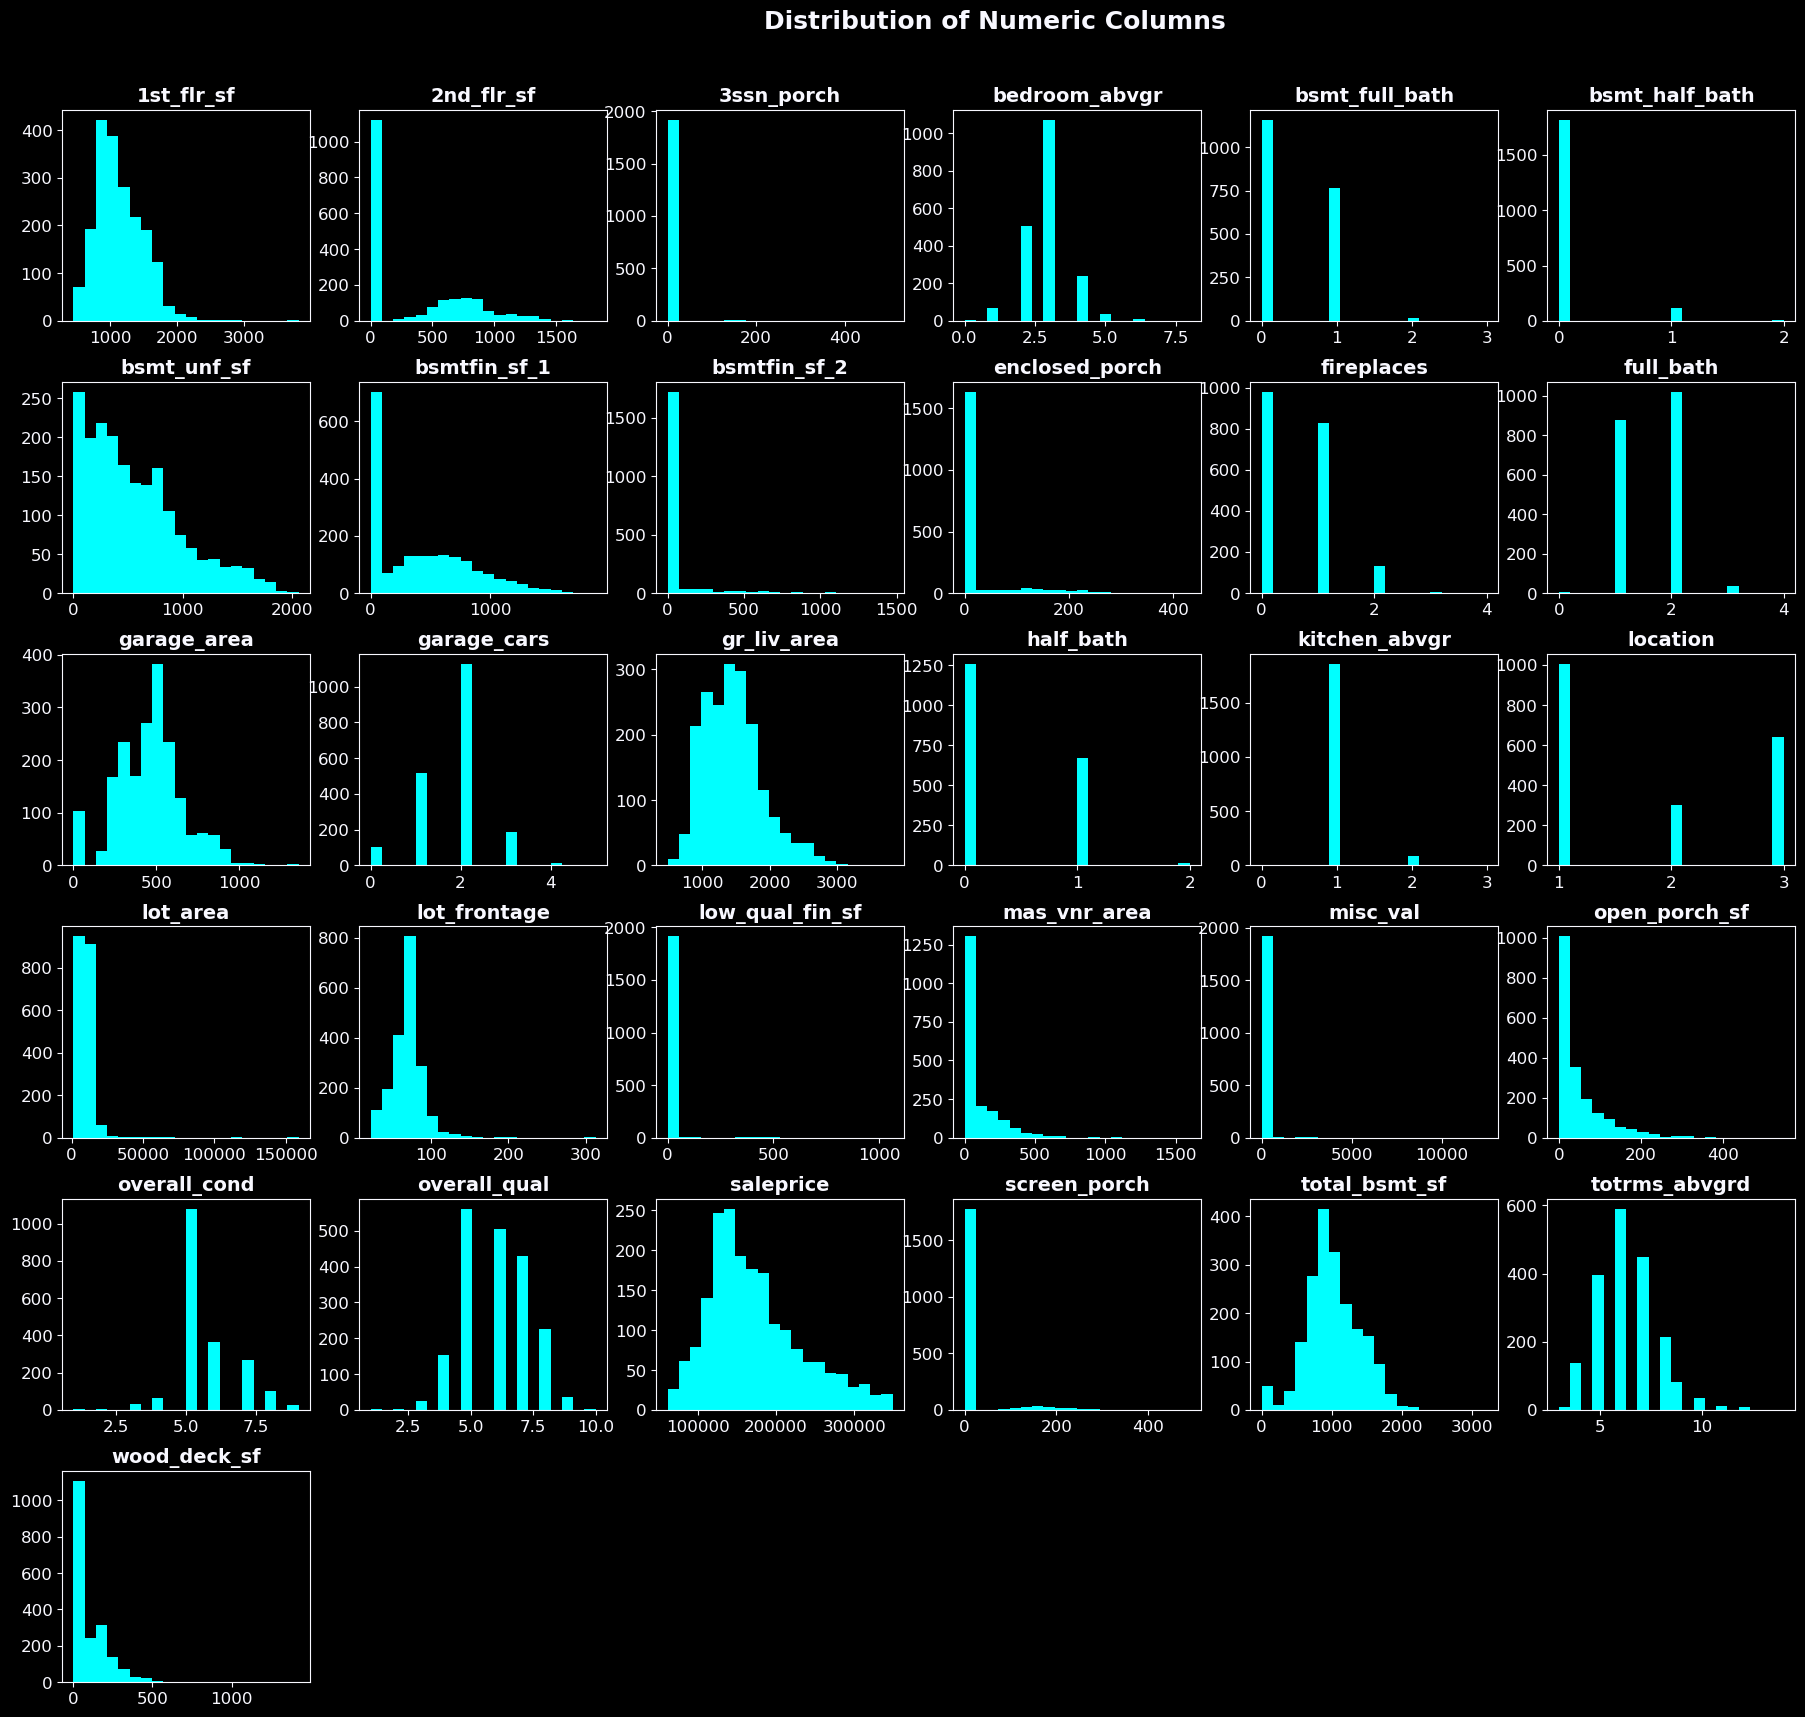

In [35]:
# Plot stolen/adapted from: 
# https://github.com/ganeshmorye/Ames_Housing_Linear_Regression_Modeling

fig=plt.figure(figsize=(20,20))
features = (
    # Dropping the same categorical "numeric" columns from earlier
    # and also pool area since only like 6 houses have pools
    df.drop(columns=[*cat_nums,'pool_area'])
    .select_dtypes(np.number)
    .columns.sort_values()
)
for i, feature in enumerate(features):
    ax=fig.add_subplot(nrows,ncols,i+1)
    df[feature].hist(bins=20,ax=ax,facecolor='cyan')
    ax.set_title(feature,color='ghostwhite')

axs = np.array(fig.get_axes())
fig.suptitle('Distribution of Numeric Columns')
format_fig(fig, 'NoFormatting')
plt.tight_layout()
plt.subplots_adjust(top=0.93, wspace = 0.20, right=0.9)
plt.show()

In [36]:
df.pool_area.value_counts()

0      1935
519       1
576       1
800       1
228       1
648       1
738       1
368       1
561       1
Name: pool_area, dtype: int64